In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
df = pd.read_csv('churn_prediction.csv')

In [3]:
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [6]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [8]:
df.shape

(28382, 21)

In [10]:
df.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT
28381,30301,1175,18,Male,0.0,student,1232.0,2,474,2107.05,...,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1,2019-11-02


In [11]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [12]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [13]:
#lets us start with the integer
df.dtypes[df.dtypes == 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

Summary:

*    **Customer id** are a unique number assigned to customers. It is are **Okay as Integer**.

*    **branch code** again represents different branches, therefore it should be **convereted to category**.

*    **Age** and **Vintage** are also numbers and hence we are okay with them as integers.

*    **customer_networth_category** is supposed to be an ordinal category, **should be converted to category**.

*    **churn** : 1 represents the churn and 0 represents not churn. However, there is no comparison between these two categories. This **needs to be converted to category datatype**.

In [16]:
df['churn'] = df['churn'].astype('category')
df['branch_code'] = df['branch_code'].astype('category')
df['customer_nw_category'] = df['customer_nw_category'].astype('category')

In [17]:
df.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                         float64
occupation                          object
city                               float64
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

## we converted int to category for those columns which should be done

In [19]:
#let us check for the float datatypes

In [20]:
df.dtypes[df.dtypes == 'float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

Summary

*    **City should be a category value. So we need to convert it.**
*    **Dependants should be a categorical value. So again we have to change it.**
*    **Now for the rest we are not going to change anything. and we will try to keep things as it is.**

In [21]:
df['dependents'] = df['dependents'].astype('category')
df['city'] = df['city'].astype('category')

In [22]:
df.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                        category
occupation                          object
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

## Now lets us go through the object dtypes.

Summary
*   **We can clearly see that Pandas were unable to identify some of the columns and it is been represented as object such as Gender, last_transaction, and occupation.**
*   **I am going to check manually for each columns.**

In [23]:
df[['gender','occupation','last_transaction']]

,gender,occupation,last_transaction
0,Male,self_employed,2019-05-21
1,Male,self_employed,2019-11-01
2,Male,salaried,NaT
3,NaN,self_employed,2019-08-06
4,Male,self_employed,2019-11-03
...,...,...,...
28377,Female,student,2019-10-22
28378,Female,self_employed,2019-12-17
28379,Male,salaried,2019-12-31
28380,Male,self_employed,NaT


#### We can clearly see that Gender and occupation belongs to caterogical dtypes and last_transaction belongs to date and time

In [24]:
df['gender'] = df['gender'].astype('category')
df['occupation'] = df['occupation'].astype('category')

In [25]:
df.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                        category
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

In [31]:
date = pd.DatetimeIndex(df['last_transaction']) #for date time column

In [32]:
date

DatetimeIndex(['2019-05-21', '2019-11-01',        'NaT', '2019-08-06',
               '2019-11-03', '2019-11-01', '2019-09-24', '2019-07-12',
               '2019-12-12', '2019-12-31',
               ...
               '2019-12-06', '2019-12-28', '2019-02-28', '2019-11-04',
                      'NaT', '2019-10-22', '2019-12-17', '2019-12-31',
                      'NaT', '2019-11-02'],
              dtype='datetime64[ns]', name='last_transaction', length=28382, freq=None)

In [33]:
# extracting new columns from "last_transaction"

# last day of year when transaction was done
df['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
df['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
df['moy_ls_tran'] = date.month

# day of week when last transaction was done
df['dow_ls_tran'] = date.dayofweek

In [34]:
df = df.drop(columns = ['last_transaction']) # we are dropping last transaction as we dont need it to perform our model
df.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                        category
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_tran                        float64
woy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran

In [35]:
df.select_dtypes(include=['int64','float64','Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [36]:
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [45]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,2], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

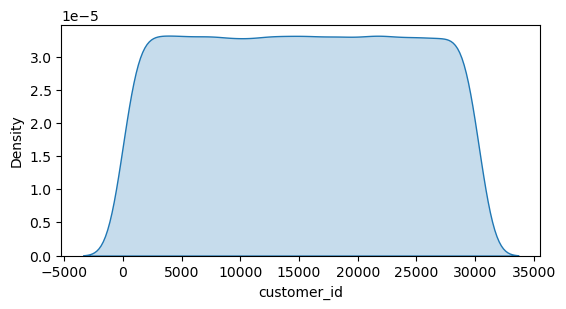

In [54]:
UVA_numeric(df,customer_details)

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

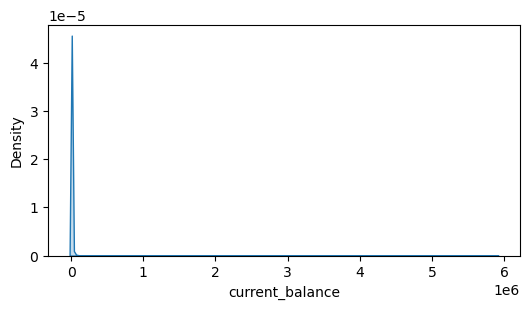

In [47]:
UVA_numeric(df,current_month)

In [49]:
df.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                        category
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_tran                        float64
woy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran

In [67]:

numerical = df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [68]:
correlation = numerical.dropna().corr()
correlation

,customer_id,vintage,age,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
customer_id,1.000000,-0.009651,0.001541,0.005988,0.005147,0.003671,-0.003868,0.002633,-0.006859,0.002705,-0.009123,0.004424,0.003691,-0.010550,0.007208,-0.009882,0.008990
vintage,-0.009651,1.000000,0.005880,-0.001731,-0.002073,-0.003786,-0.003531,-0.004911,-0.000180,-0.005053,-0.007170,-0.002360,-0.003627,-0.004435,-0.012589,-0.005372,-0.008596
age,0.001541,0.005880,1.000000,0.051896,0.056351,0.059950,0.057780,0.025688,0.031957,0.029813,0.035549,0.055441,0.058597,0.016642,0.003852,0.017257,-0.017958
current_balance,0.005988,-0.001731,0.051896,1.000000,0.945291,0.956524,0.702469,0.030892,0.062775,0.045188,0.082299,0.982686,0.940032,0.019978,-0.000374,0.019094,0.003441
previous_month_end_balance,0.005147,-0.002073,0.056351,0.945291,1.000000,0.969295,0.711315,0.033085,0.116568,0.066988,0.111357,0.973843,0.968213,0.014381,0.003973,0.014125,0.004301
average_monthly_balance_prevQ,0.003671,-0.003786,0.059950,0.956524,0.969295,1.000000,0.753168,0.034278,0.087398,0.061488,0.123279,0.975238,0.993908,0.012688,0.002552,0.012721,0.003469
average_monthly_balance_prevQ2,-0.003868,-0.003531,0.057780,0.702469,0.711315,0.753168,1.000000,0.036945,0.063387,0.045961,0.103883,0.713989,0.725502,0.006363,-0.012678,0.005499,-0.002391
current_month_credit,0.002633,-0.004911,0.025688,0.030892,0.033085,0.034278,0.036945,1.000000,0.168086,0.937300,0.135231,0.034810,0.038995,0.033129,0.010479,0.031521,0.000947
previous_month_credit,-0.006859,-0.000180,0.031957,0.062775,0.116568,0.087398,0.063387,0.168086,1.000000,0.164427,0.733811,0.086949,0.110735,0.071645,0.019146,0.068229,-0.007766
current_month_debit,0.002705,-0.005053,0.029813,0.045188,0.066988,0.061488,0.045961,0.937300,0.164427,1.000000,0.191022,0.070997,0.063982,0.039154,0.019272,0.037663,0.000747


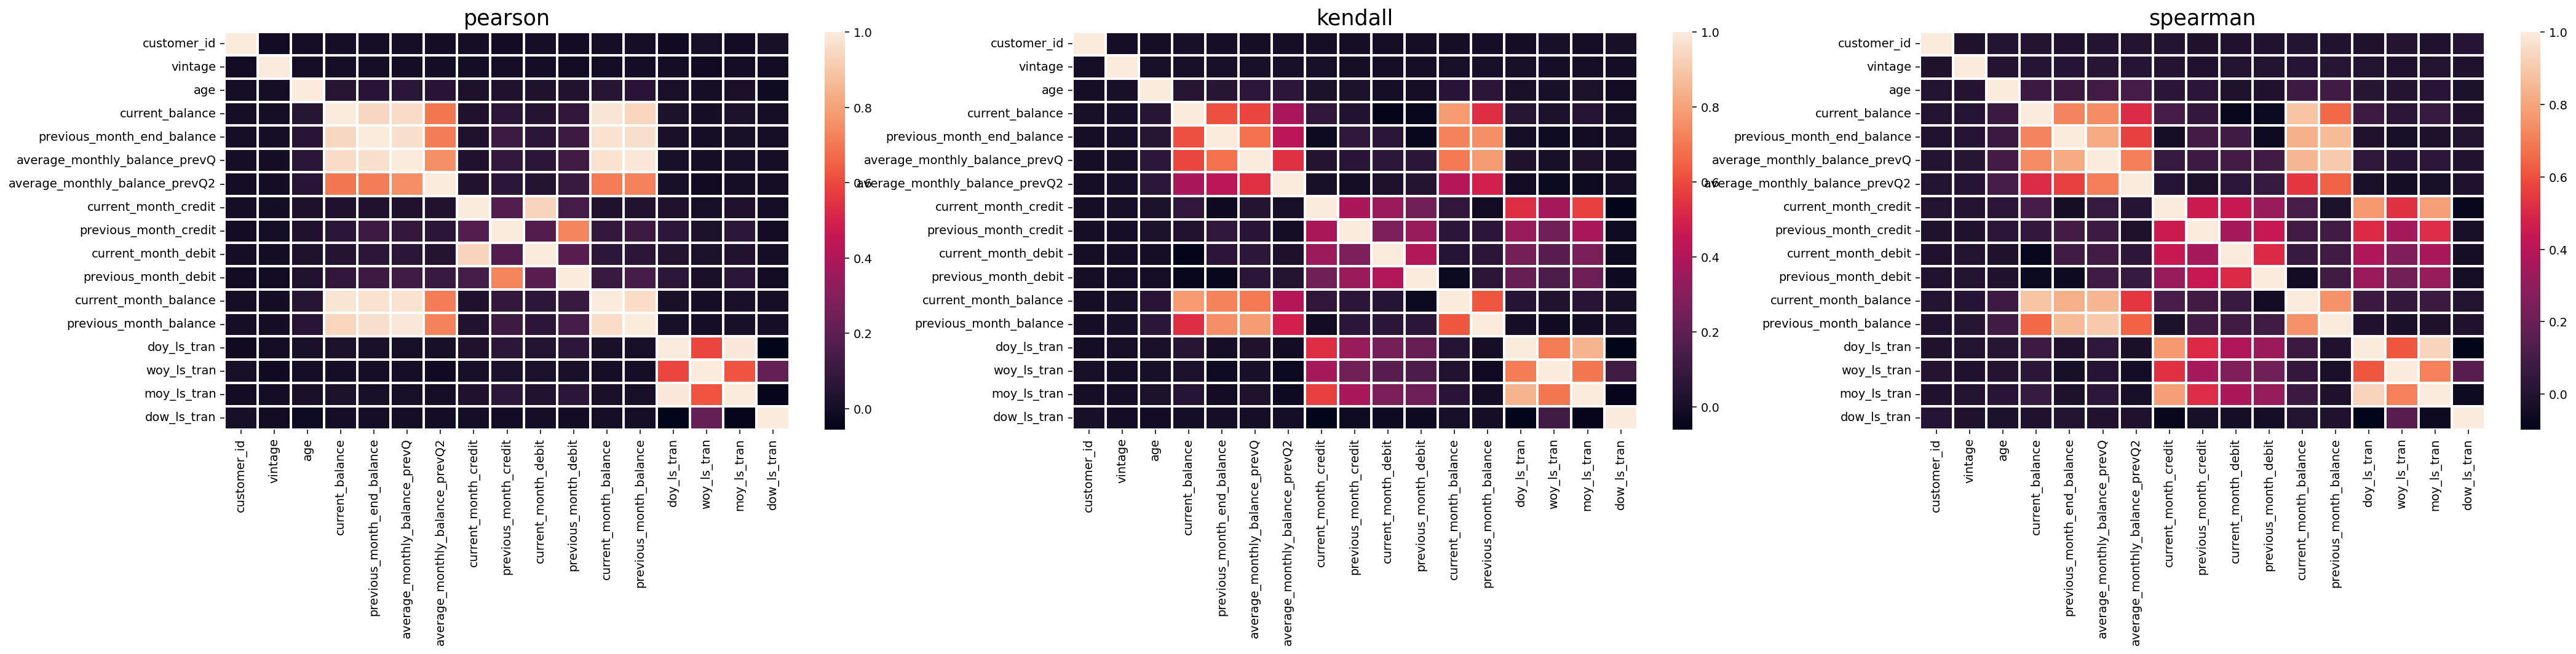

In [69]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  Too many variables with insignificant correlation.
*  Major correlation lies between the transaction variables and balance variables.

In [70]:
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)

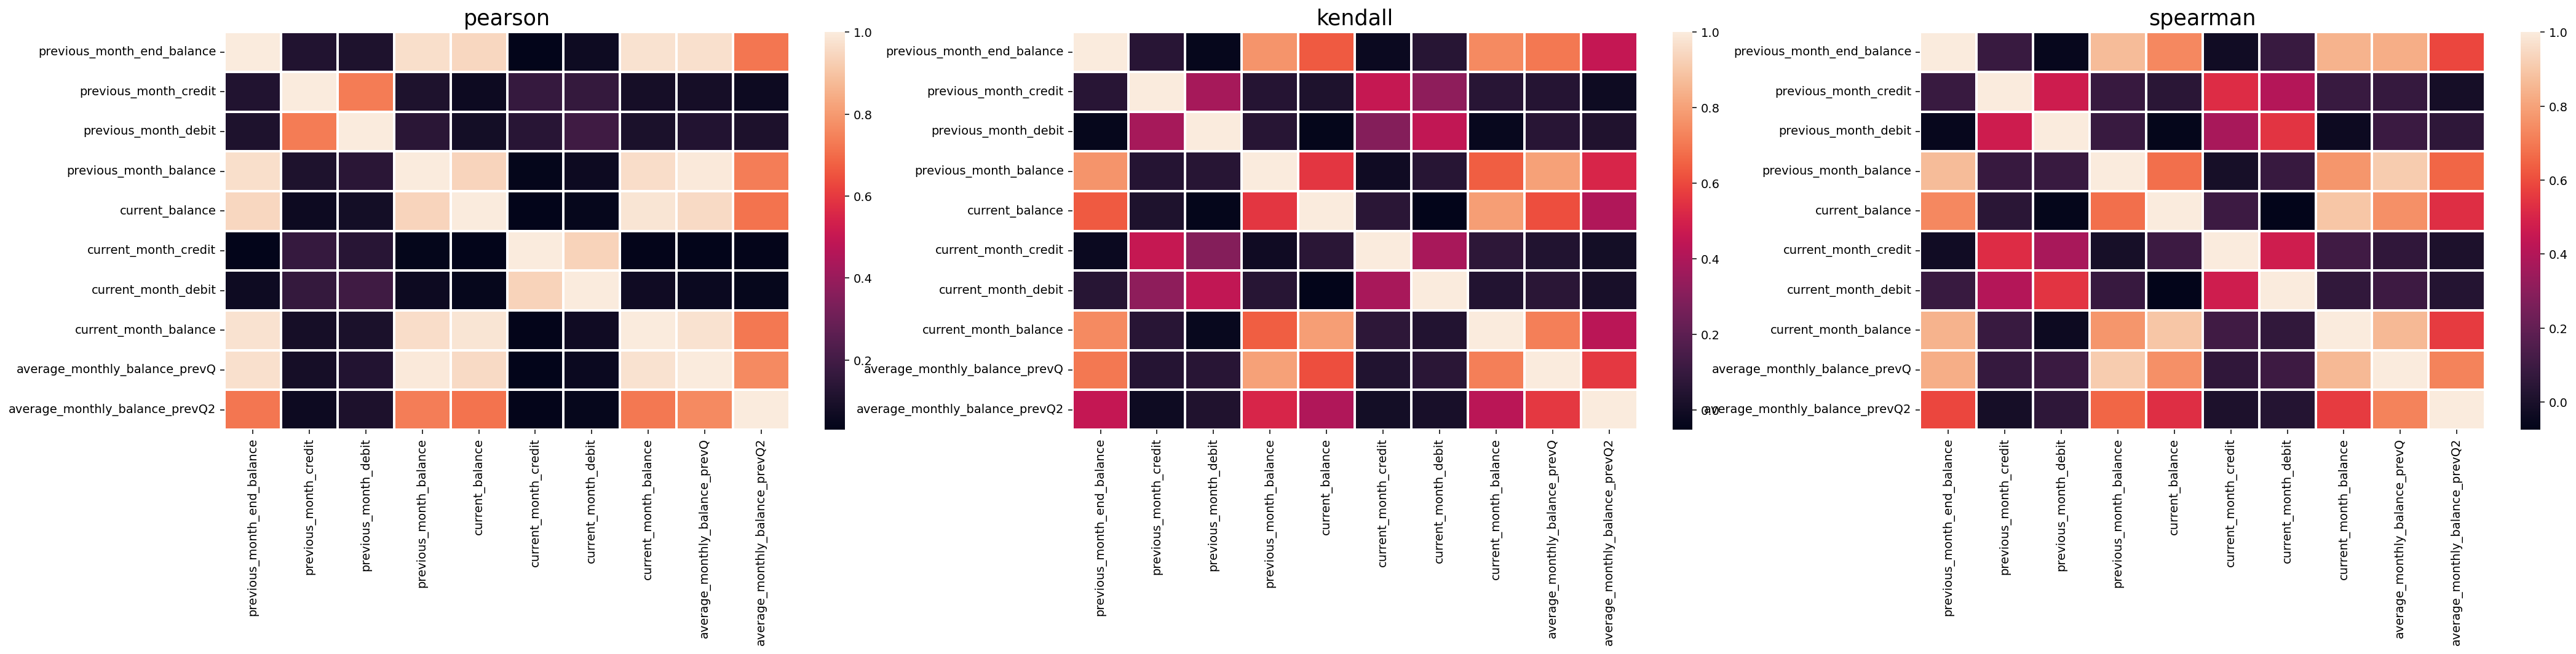

In [71]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

In [73]:
df['gender'] = df['gender'].astype('object')
df['occupation'] = df['occupation'].astype('object')
df['customer_nw_category'] = df['customer_nw_category'].astype('object')
df['churn'] = df['churn'].astype('int')
df['city'] = df['city'].astype('float')
df['branch_code'] = df['branch_code'].astype('float')

In [74]:
df.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc='mean')*100

customer_nw_category           1          2          3
gender occupation                                     
Female company        100.000000   0.000000  66.666667
       retired         20.689655  11.219512  13.492063
       salaried        18.545455  14.849188  17.689016
       self_employed   18.111588  18.197035  18.920916
       student         10.404624  14.442413  15.034965
Male   company          0.000000   0.000000   0.000000
       retired         18.497110  14.251781  16.316640
       salaried        17.557252  16.410469  18.468702
       self_employed   22.832370  20.424978  21.465808
       student         16.969697  17.210145  18.208955

In [77]:
age = pd.cut(df['age'], [0, 25, 50, 100])
df.pivot_table('churn', ['gender', age], 'occupation', aggfunc='sum')

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]          0        0         7             27      102
       (25, 50]         2        0       226            852       38
       (50, 100]        1       52        70            605        0
Male   (0, 25]          0        0        17             74      137
       (25, 50]         0        2       563           1107       47
       (50, 100]        0      251       264            698        0

In [78]:
balance = pd.qcut(df['current_balance'], 3)
df.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='sum')

current_balance  (-5503.961, 2202.177]                                         \
occupation                     company retired salaried self_employed student   
gender age                                                                      
Female (0, 25]                       0       0        5            22      64   
       (25, 50]                      1       0      146           522      20   
       (50, 100]                     1      34       45           353       0   
Male   (0, 25]                       0       0       12            52      95   
       (25, 50]                      0       0      328           694      30   
       (50, 100]                     0     156      150           364       0   

current_balance  (2202.177, 5114.317]                                         \
occupation                    company retired salaried self_employed student   
gender age                                                                     
Female (0, 25]                      0       0        1             4      21   
       (25, 50]                     1       0       51           171       7   
       (50, 100]                    0       8       14           125       0   
Male   (0, 25]                      0       0        4            12      20   
       (25, 50]                     0       1      129           208      10   
       (50, 100]                    0      39       52           143       0   

current_balance  (5114.317, 5905904.03]                                         
occupation                      company retired salaried self_employed student  
gender age                                                                      
Female (0, 25]                        0       0        1             1      17  
       (25, 50]                       0       0       29           159      11  
       (50, 100]                      0      10       11           127       0  
Male   (0, 25]                        0       0        1            10      22  
       (25, 50]                       0       1      106           205       7  
       (50, 100]                      0      56       62           191       0

In [79]:
balance = pd.qcut(df['current_balance'], 3)
df.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='mean')*100

current_balance  (-5503.961, 2202.177]                                      \
occupation                     company    retired   salaried self_employed   
gender age                                                                   
Female (0, 25]                     NaN        NaN  26.315789     38.596491   
       (25, 50]                   50.0   0.000000  32.300885     33.677419   
       (50, 100]                 100.0  28.333333  35.156250     30.642361   
Male   (0, 25]                     0.0        NaN  35.294118     52.000000   
       (25, 50]                    0.0   0.000000  33.367243     38.901345   
       (50, 100]                   0.0  29.489603  32.119914     33.060854   

current_balance             (2202.177, 5114.317]                        \
occupation          student              company    retired   salaried   
gender age                                                               
Female (0, 25]    21.262458                  NaN        NaN   5.882353   
       (25, 50]   25.974026                100.0   0.000000   9.826590   
       (50, 100]   0.000000                  NaN   5.633803  11.200000   
Male   (0, 25]    28.189911                  NaN        NaN  14.285714   
       (25, 50]   44.117647                  0.0  16.666667  11.889401   
       (50, 100]        NaN                  0.0   6.927176  10.766046   

current_balance                           (5114.317, 5905904.03]             \
occupation       self_employed    student                company    retired   
gender age                                                                    
Female (0, 25]       10.810811   7.167235                    NaN        NaN   
       (25, 50]      10.891720   6.862745                    0.0        NaN   
       (50, 100]     11.052166        NaN                    0.0   8.196721   
Male   (0, 25]       14.117647   6.493506                    NaN        NaN   
       (25, 50]      13.214740  12.345679                    0.0  20.000000   
       (50, 100]     12.565905        NaN                    0.0  10.606061   

current_balance                                       
occupation         salaried self_employed    student  
gender age                                            
Female (0, 25]    12.500000      3.333333  10.240964  
       (25, 50]    6.697460     11.990950  16.666667  
       (50, 100]   8.029197     10.583333        NaN  
Male   (0, 25]     5.263158     16.949153  12.021858  
       (25, 50]    9.005947     12.058824   9.459459  
       (50, 100]  10.544218     13.941606   0.000000

In [80]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')



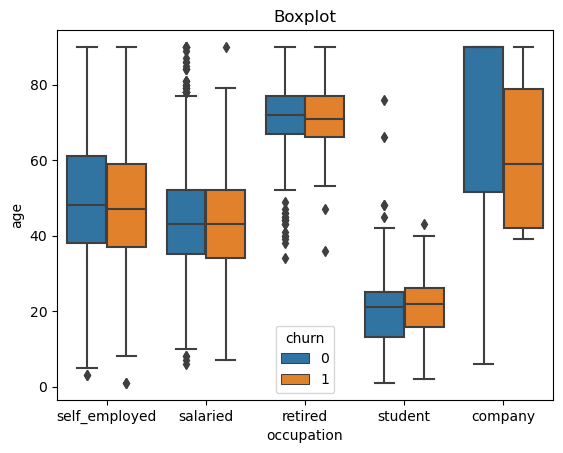

In [82]:
Grouped_Box_Plot(df,'age', 'occupation', 'churn')

In [85]:
data_encoded = pd.get_dummies(df, drop_first=True)
data_encoded.head()

,customer_id,vintage,age,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,dependents_32.0,dependents_36.0,dependents_50.0,dependents_52.0,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,1,2101,66,187.0,755.0,1458.71,1458.71,1458.71,1449.07,0.20,...,0,0,0,0,0,0,1,0,1,0
1,2,2348,35,NaN,3214.0,5390.37,8704.66,7799.26,12419.41,0.56,...,0,0,0,0,0,0,1,0,1,0
2,4,2194,31,146.0,41.0,3913.16,5815.29,4910.17,2815.94,0.61,...,0,0,0,0,0,1,0,0,1,0
3,5,2329,90,1020.0,582.0,2291.91,2291.91,2084.54,1006.54,0.47,...,0,0,0,0,0,0,1,0,1,0
4,6,1579,42,1494.0,388.0,927.72,1401.72,1643.31,1871.12,0.33,...,0,0,0,0,0,0,1,0,0,1


In [86]:
def fill_mode(df):
    for column in df.columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [87]:
fill_mode(data_encoded)

In [88]:
data_encoded = data_encoded.drop('customer_id', axis=1)

In [89]:
x = data_encoded.drop(['churn'], axis=1)
y = data_encoded['churn']
x.shape, y.shape

((28382, 39), (28382,))

In [90]:
x

,vintage,age,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,...,dependents_32.0,dependents_36.0,dependents_50.0,dependents_52.0,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,2101,66,187.0,755.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,...,0,0,0,0,0,0,1,0,1,0
1,2348,35,1020.0,3214.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,...,0,0,0,0,0,0,1,0,1,0
2,2194,31,146.0,41.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,...,0,0,0,0,0,1,0,0,1,0
3,2329,90,1020.0,582.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,...,0,0,0,0,0,0,1,0,1,0
4,1579,42,1494.0,388.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,2325,10,1020.0,1207.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,...,0,0,0,0,0,0,0,1,1,0
28378,1537,34,1046.0,223.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,...,0,0,0,0,0,0,1,0,1,0
28379,2376,47,1096.0,588.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,...,0,0,0,0,0,1,0,0,1,0
28380,1745,50,1219.0,274.0,1625.55,1625.55,1683.20,1857.42,0.20,0.20,...,0,0,0,0,0,0,1,0,0,1


In [91]:
y

0        0
1        0
2        0
3        1
4        1
        ..
28377    0
28378    0
28379    1
28380    0
28381    1
Name: churn, Length: 28382, dtype: int32

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .28, random_state = 56)

In [97]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20435, 39), (7947, 39), (20435,), (7947,))

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

In [99]:
x_train_scale

array([[-1.28980905,  0.54592598, -1.08262427, ..., -0.2769772 ,
         0.97491688, -0.74240244],
       [ 1.25656449,  0.15364786, -0.74531996, ..., -0.2769772 ,
         0.97491688, -0.74240244],
       [ 0.36735468,  0.32176705,  0.72335925, ..., -0.2769772 ,
         0.97491688, -0.74240244],
       ...,
       [ 0.12116849, -0.63090837, -1.73849377, ..., -0.2769772 ,
         0.97491688, -0.74240244],
       [-1.50659987, -0.96714675,  1.72121785, ..., -0.2769772 ,
        -1.02572847,  1.34697834],
       [-0.38590156,  0.0415684 , -1.45740684, ..., -0.2769772 ,
         0.97491688, -0.74240244]])

In [100]:
x_test_scale

array([[ 8.15848504e-01, -6.09874133e-02,  9.93108329e-01, ...,
        -2.86287473e-01,  9.73056928e-01, -7.47969517e-01],
       [ 1.29431824e-02, -9.64479383e-01,  6.78201042e-01, ...,
        -2.86287473e-01,  9.73056928e-01, -7.47969517e-01],
       [ 6.80814427e-01,  5.03695068e-01, -4.30920945e-01, ...,
        -2.86287473e-01,  9.73056928e-01, -7.47969517e-01],
       ...,
       [-1.65509614e-03, -9.64479383e-01,  6.78201042e-01, ...,
         3.49299251e+00,  9.73056928e-01, -7.47969517e-01],
       [ 2.79361766e-01,  2.21353827e-01,  5.02223441e-01, ...,
        -2.86287473e-01, -1.02768910e+00,  1.33695288e+00],
       [-3.41065073e-01, -5.12733398e-01,  2.35941544e-01, ...,
        -2.86287473e-01,  9.73056928e-01, -7.47969517e-01]])

In [103]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [104]:
y_pred = lr.predict(x_test)

In [105]:
from sklearn.metrics import *

In [106]:
accuracy_score(y_pred,y_test)

0.8277337360010066